In [52]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import hsv_to_rgb

# Import Data
df_apt = pd.read_csv('Map_Data.csv')
df_geo = pd.read_csv('GS_Final_Data_for_processing.csv')



### Map of geospacial data points:

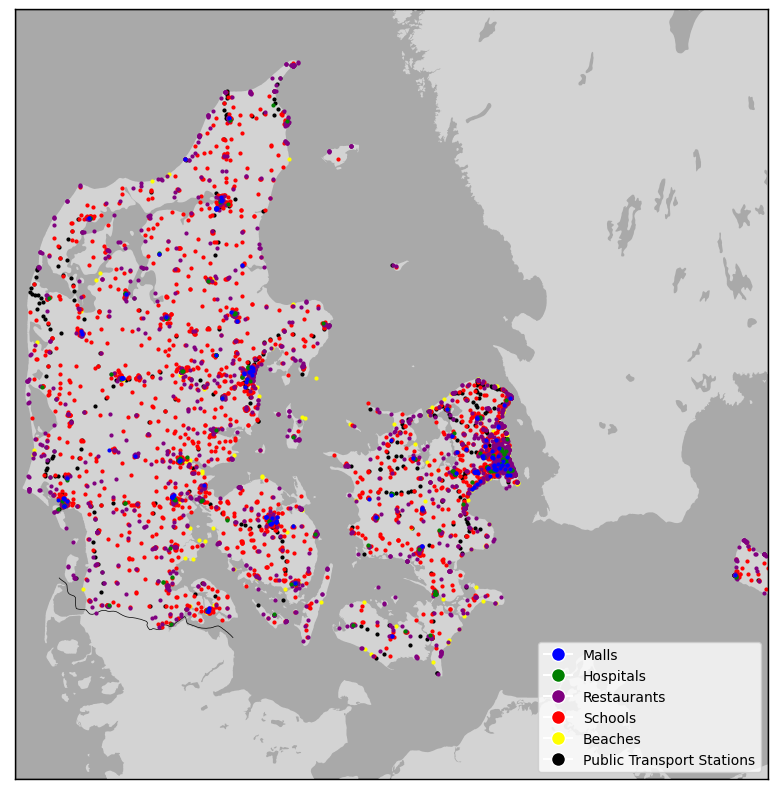

In [53]:
# Define a color mapping based on the Type
type_color_mapping = {
    "Malls": "blue",
    "Hospitals": "green",
    "Restaurants": "purple",
    "Schools": "red",
    "Beaches": "yellow",
    "Public Transport Stations": "black"
}

# Create a map focused on Denmark
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=54, urcrnrlat=58, llcrnrlon=8, urcrnrlon=15, resolution='f')
m.drawcountries()
m.drawmapboundary(fill_color='#A9A9A9')  # Darker grey for water
m.fillcontinents(color='#D3D3D3',lake_color='#A9A9A9')  # Light grey for land

# Plot the data points on the map
for idx, row in df_geo.iterrows():
    color = type_color_mapping.get(row["Type"], "black")
    x, y = m(row["Longitude"], row["Latitude"])
    m.plot(x, y, 'o', color=color, markersize=2)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=type_) for type_, color in type_color_mapping.items()]
plt.legend(handles=legend_elements, loc='lower right')

plt.show()


### Map of apartments data points:

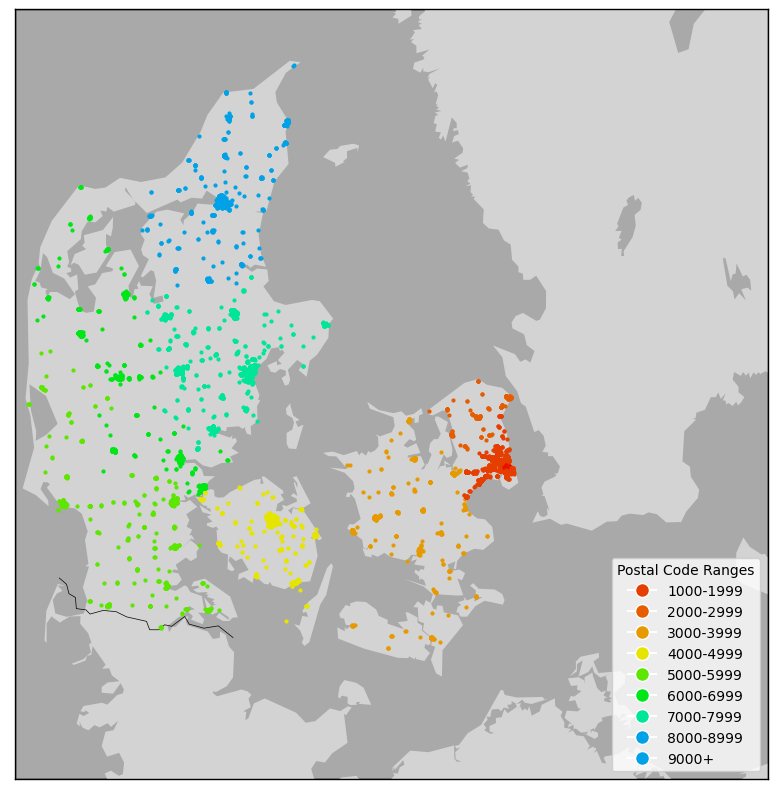

In [98]:
# Define a function to map colors based on postal code
def get_color(postal_code):
    if 1000 <= postal_code < 2000:
        hue = 0.1111*0.1
    elif 2000 <= postal_code < 3000:
        hue = 0.2222*0.2
    elif 3000 <= postal_code < 4000:
        hue = 0.3333*0.2
    elif 4000 <= postal_code < 5000:
        hue = 0.4444*0.25
    elif 5000 <= postal_code < 6000:
        hue = 0.5555*0.3
    elif 6000 <= postal_code < 7000:
        hue = 0.6666*0.4
    elif 7000 <= postal_code < 8000:
        hue = 0.7777*0.45
    elif 8000 <= postal_code < 9000:
        hue = 0.8888*0.5
    else:
        hue = 0.9999*0.55
    
    saturation = 1.0
    brightness = 0.9
    
    hsv_color = (hue, saturation, brightness)
    rgb_color = hsv_to_rgb(hsv_color)
    
    return tuple(rgb_color)


# Create a map focused on Denmark
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=54, urcrnrlat=58, llcrnrlon=8, urcrnrlon=15, resolution='f')
m.drawcountries()
m.drawmapboundary(fill_color='#A9A9A9')  # Darker grey for water
m.fillcontinents(color='#D3D3D3', lake_color='#A9A9A9')  # Light grey for land

# Plot the data points on the map
for idx, row in df_apt.iterrows():
    color = get_color(row["Postal code"])  # Use the correct column name
    x, y = m(row["Longitude"], row["Latitude"])
    m.plot(x, y, 'o', color=color, markersize=2)

# Add a legend for the postal code ranges
labels = ["1000-1999", "2000-2999", "3000-3999", "4000-4999", "5000-5999", "6000-6999", "7000-7999", "8000-8999", "9000+"]
colors = [get_color(code * 1000 + 1000) for code in range(1, 10)]
patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for label, color in zip(labels, colors)]

# Adjust legend placement
plt.legend(handles=patches, title="Postal Code Ranges", loc='lower right', bbox_to_anchor=(0.99, 0.01), borderaxespad=0.)

plt.show()


### Map of apartment and distance from geospacial data:

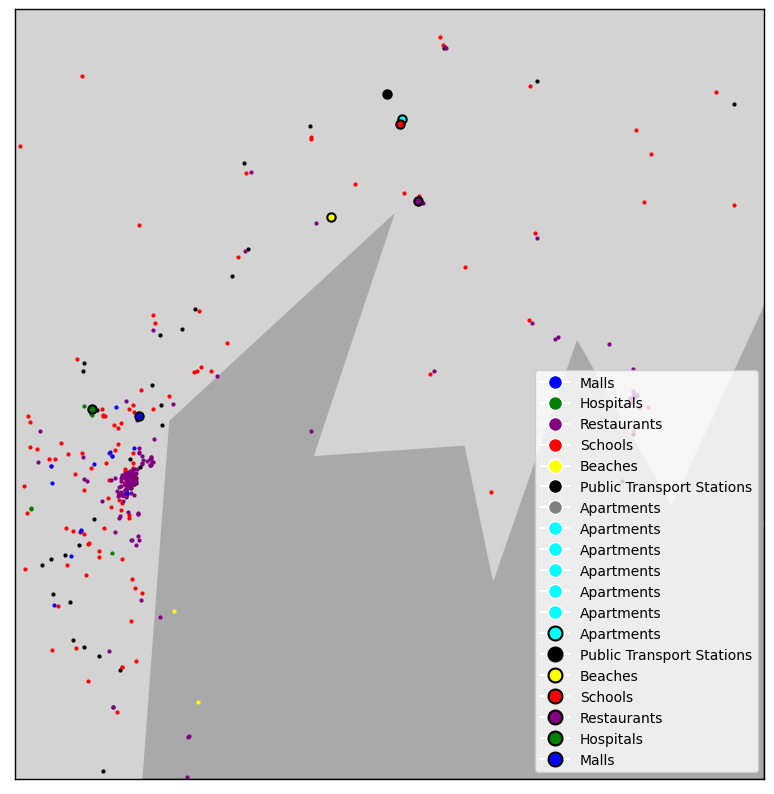

In [120]:
# Define a color mapping based on the Type
type_color_mapping = {
    "Malls": "blue",
    "Hospitals": "green",
    "Restaurants": "purple",
    "Schools": "red",
    "Beaches": "yellow",
    "Public Transport Stations": "black"
}

# Create a map focused on Denmark
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='merc', llcrnrlat=56.0, urcrnrlat=56.4, llcrnrlon=10.1, urcrnrlon=10.8, resolution='l')
m.drawcountries()
m.drawmapboundary(fill_color='#A9A9A9')  # Darker grey for water
m.fillcontinents(color='#D3D3D3',lake_color='#A9A9A9')  # Light grey for land

# Plot the data points on the map
for idx, row in df_geo.iterrows():
    color = type_color_mapping.get(row["Type"], "black")
    x, y = m(row["Longitude"], row["Latitude"])
    m.plot(x, y, 'o', color=color, markersize=2)

# Retrieve coordinates of the new apartment and related points (index 5541)
apt_coords = df_apt.loc[5541, ["Longitude", "Latitude"]]
apt_color = type_color_mapping.get("Apartments", "cyan") 

# Plot the new apartment on the map with a larger size and black outline
apt_x, apt_y = m(apt_coords["Longitude"], apt_coords["Latitude"])
m.plot(apt_x, apt_y, 'o', color=apt_color, markersize=6, markeredgecolor='black', markeredgewidth=1.5)

# Retrieve and plot the related points
related_points = [
    ('Public Transport Stations', 'closest_Public Transport Stations_longitude', 'closest_Public Transport Stations_latitude'),
    ('Beaches', 'closest_Beaches_longitude', 'closest_Beaches_latitude'),
    ('Schools', 'closest_Schools_longitude', 'closest_Schools_latitude'),
    ('Restaurants', 'closest_Restaurants_longitude', 'closest_Restaurants_latitude'),
    ('Hospitals', 'closest_Hospitals_longitude', 'closest_Hospitals_latitude'),
    ('Malls', 'closest_Malls_longitude', 'closest_Malls_latitude')
]

for point_type, lon_col, lat_col in related_points:
    lon = df_apt.loc[5541, lon_col]
    lat = df_apt.loc[5541, lat_col]
    color = type_color_mapping.get(point_type, "black")
    x, y = m(lon, lat)
    m.plot(x, y, 'o', color=color, markersize=6, markeredgecolor='black', markeredgewidth=1.5)

# Update the legend to include the new apartment and related points type/color
for point_type, _, _ in related_points:
    legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor=type_color_mapping.get(point_type, "black"), markeredgecolor='black', markersize=10, markeredgewidth=1.5, label=point_type))

plt.legend(handles=legend_elements, loc='lower right')

plt.show()


In [119]:
# print collum names in df_apt:
print(df_apt.columns)


Index(['City', 'Postal code', 'Latitude', 'Longitude', 'Monthly rent',
       'Aconto', 'Square meters', 'Rooms', 'Floor', 'Property type',
       'Furnished', 'Shareable', 'Pets allowed', 'Elevator', 'Senior frendly',
       'Only for students', 'Balcony/Terrace', 'Parking',
       'PostalCode_1000-2999', 'PostalCode_2000-3999', 'PostalCode_3000-4999',
       'PostalCode_4000-5999', 'PostalCode_5000-6999', 'PostalCode_6000-7999',
       'PostalCode_7000-8999', 'PostalCode_8000-9999', 'PostalCode_9000-10999',
       'closest_Public Transport Stations_latitude',
       'closest_Public Transport Stations_longitude',
       'closest_Beaches_latitude', 'closest_Beaches_longitude',
       'closest_Schools_latitude', 'closest_Schools_longitude',
       'closest_Restaurants_latitude', 'closest_Restaurants_longitude',
       'closest_Hospitals_latitude', 'closest_Hospitals_longitude',
       'closest_Malls_latitude', 'closest_Malls_longitude',
       'distance_to_Public Transport Stations', 'd